# Imported Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import norm
from sklearn.metrics import r2_score

# Data

## Data Import

In [4]:
df = pd.read_csv("NY-House-Dataset.csv")
df.head(2)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991


# Exploratory Graphical Analysis

## Heatmap

<Axes: >

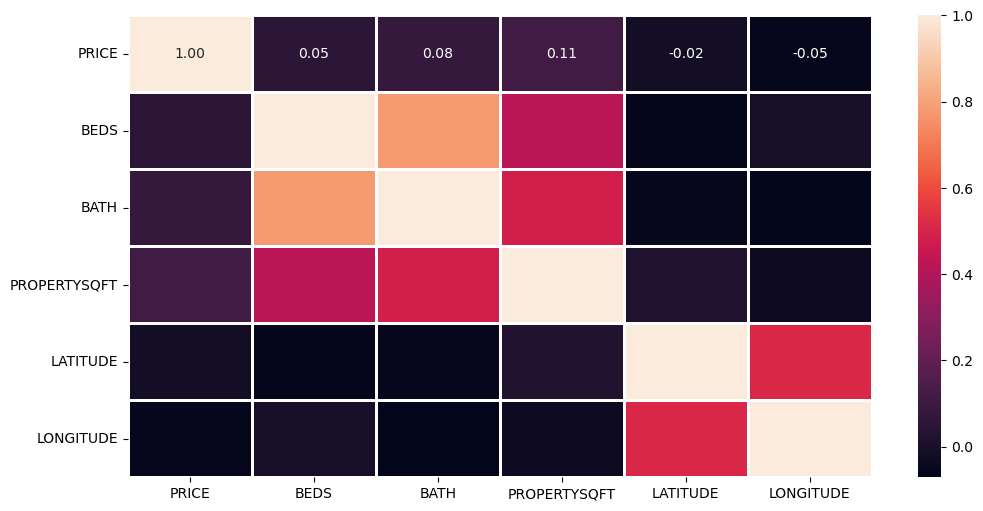

In [5]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'rocket',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

## Histogram

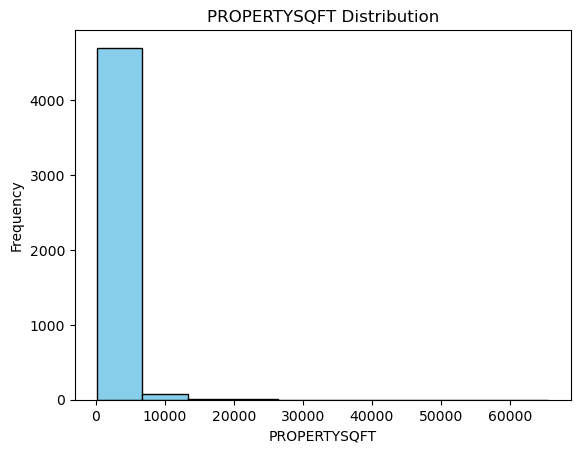

count     4801.000000
mean      2184.207862
std       2377.140894
min        230.000000
25%       1200.000000
50%       2184.207862
75%       2184.207862
max      65535.000000
Name: PROPERTYSQFT, dtype: float64

In [6]:
plt.hist(df['PROPERTYSQFT'], bins=10, color='skyblue', edgecolor='black')
 
plt.xlabel('PROPERTYSQFT')
plt.ylabel('Frequency')
plt.title('PROPERTYSQFT Distribution')
 
plt.show()
df['PROPERTYSQFT'].describe()

## Scatterplot

count    4.801000e+03
mean     2.356940e+06
std      3.135525e+07
min      2.494000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.495000e+06
max      2.147484e+09
Name: PRICE, dtype: float64

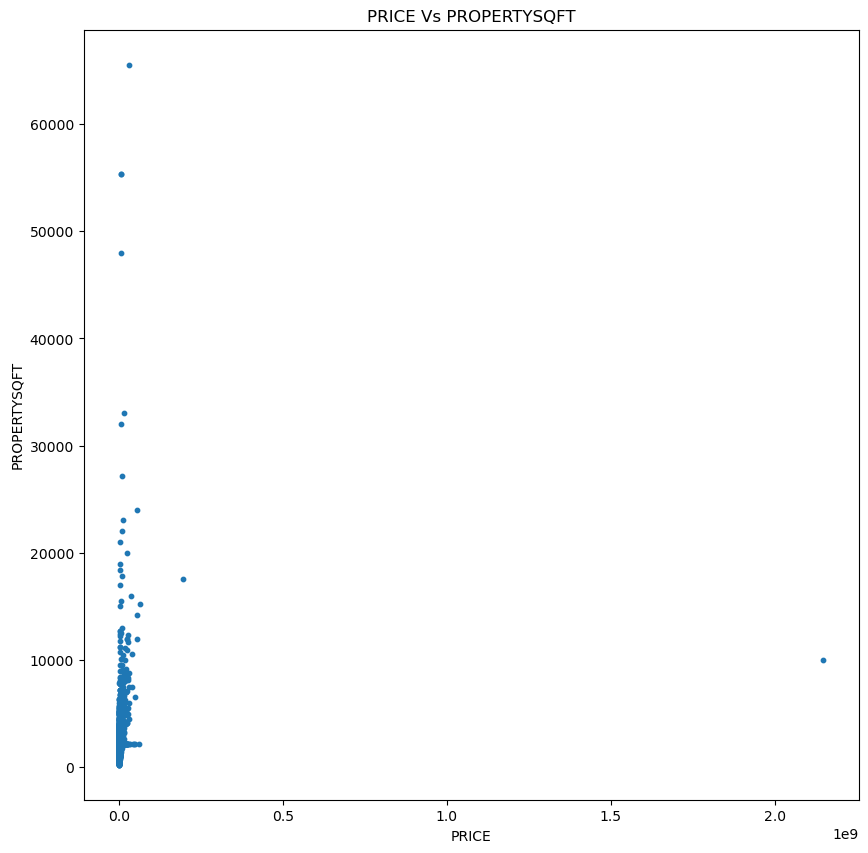

In [7]:
plt.figure(figsize=(10,10))
plt.scatter( df['PRICE'], df['PROPERTYSQFT'], s = 10)
plt.xlabel('PRICE')
plt.ylabel('PROPERTYSQFT')
plt.title('PRICE Vs PROPERTYSQFT')
plt.plot()


df['PRICE'].describe()

In [8]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [9]:
geometry_NY = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]

In [10]:
geo_df = gpd.GeoDataFrame(df, geometry=geometry_NY) 
geo_df.head(1)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,geometry
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,POINT (-73.97448 40.76125)


In [11]:
geo_df.dtypes

BROKERTITLE                      object
TYPE                             object
PRICE                             int64
BEDS                              int64
BATH                            float64
PROPERTYSQFT                    float64
ADDRESS                          object
STATE                            object
MAIN_ADDRESS                     object
ADMINISTRATIVE_AREA_LEVEL_2      object
LOCALITY                         object
SUBLOCALITY                      object
STREET_NAME                      object
LONG_NAME                        object
FORMATTED_ADDRESS                object
LATITUDE                        float64
LONGITUDE                       float64
geometry                       geometry
dtype: object

In [12]:
def format_int_with_commas(x):
    """
    Formats an integer with commas as thousand separators.
    """
    return f"{x:,}"

In [13]:
geo_df['PRICE'] = geo_df['PRICE'].map(format_int_with_commas)

In [14]:
geo_df['PRICE_Int'] = geo_df['PRICE'].str.replace(',','')

In [15]:
geo_df['PRICE_Int'] = geo_df['PRICE_Int'].astype('int64')

In [16]:
print(geo_df['PRICE_Int'])

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4796       599000
4797       245000
4798      1275000
4799       598125
4800       349000
Name: PRICE_Int, Length: 4801, dtype: int64


In [17]:
Boroughs_map = gpd.read_file('Boroughs.shx')

In [18]:
df['PRICE_Int'].describe()

count    4.801000e+03
mean     2.356940e+06
std      3.135525e+07
min      2.494000e+03
25%      4.990000e+05
50%      8.250000e+05
75%      1.495000e+06
max      2.147484e+09
Name: PRICE_Int, dtype: float64

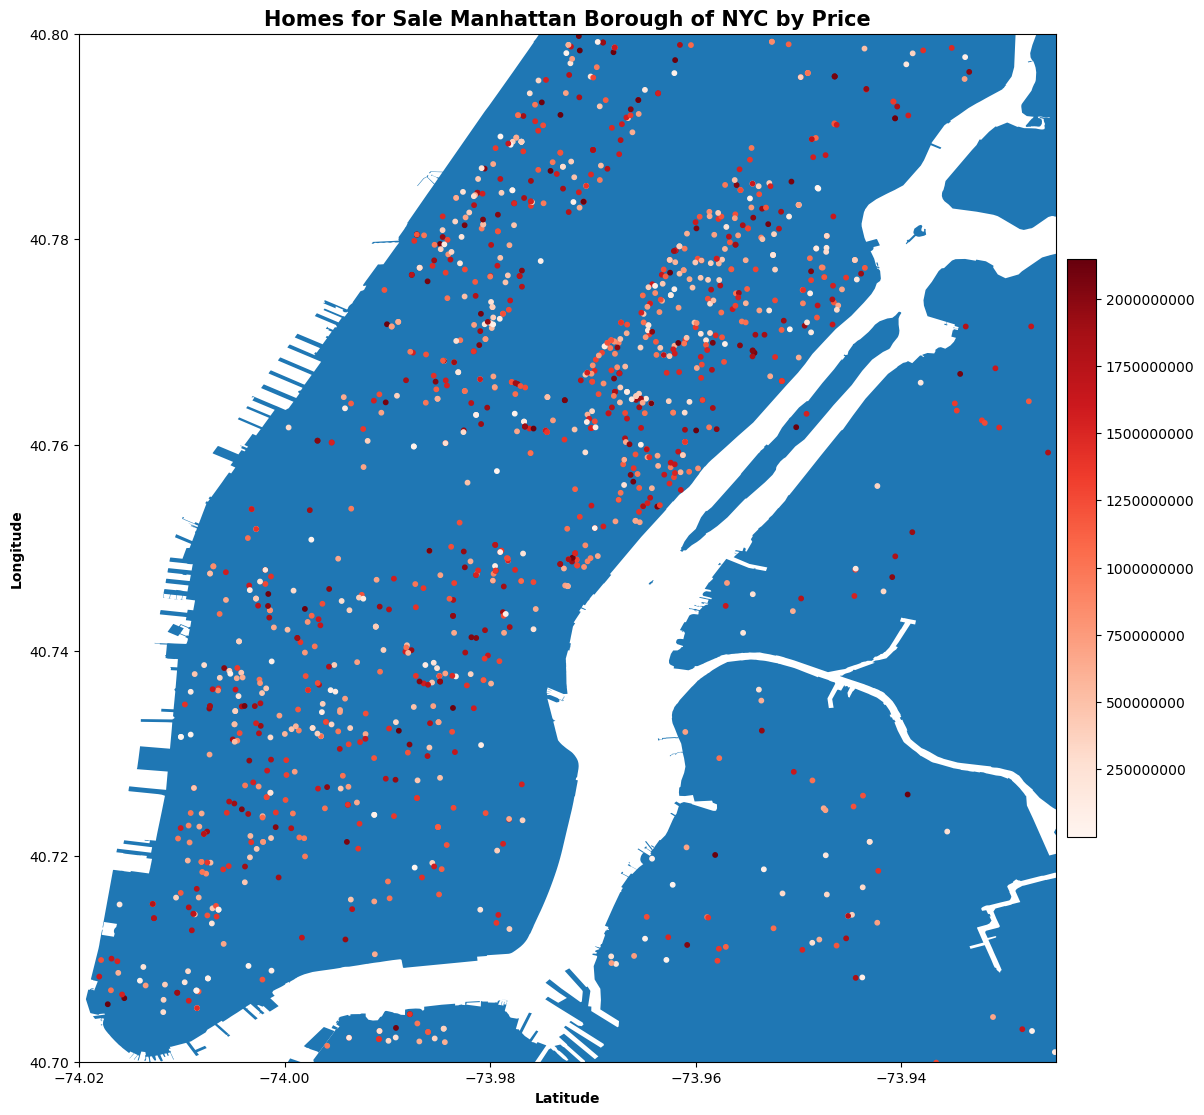

In [19]:
fig, ax = plt.subplots(figsize = (15,15))


Boroughs_map.plot(ax = ax) 

plt.title("Homes for Sale Manhattan Borough of NYC by Price", fontsize = 15,fontweight = "bold")


geo_df.plot(column = 'PRICE_Int', ax = ax, alpha = 0, legend = True,  markersize = 10, cmap = 'Reds', legend_kwds = {'label': "",'orientation': "vertical",'pad': 0.01, 'format': "%.0f", 'shrink': 0.5})
geo_df.plot(column = 'PRICE' ,ax = ax, alpha = 1, legend = False, markersize = 10, cmap = 'Reds')

            
plt.xlim(-74.02,-73.925)
plt.xlabel("Latitude", fontweight = "bold")

plt.ylim( 40.7,40.8)
plt.ylabel("Longitude", fontweight = "bold")



plt.show()


## Boxplot

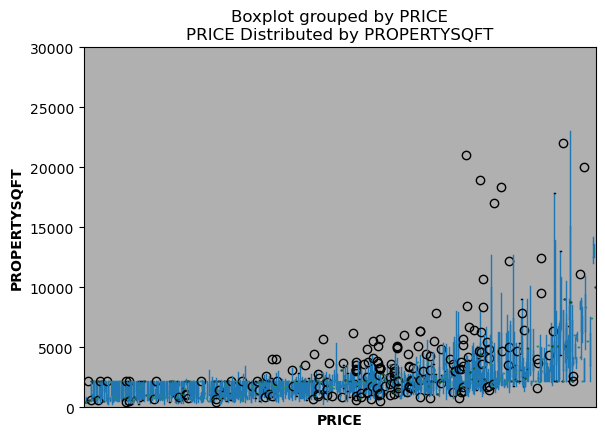

In [20]:
df.boxplot(column = 'PROPERTYSQFT', by ='PRICE')

plt.xlabel('PRICE', fontweight = "bold")
plt.ylabel('PROPERTYSQFT', fontweight = "bold")
plt.title('PRICE Distributed by PROPERTYSQFT')

plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.ylim( 0, 30000)

plt.show()

## Boxplot

<Axes: xlabel='PROPERTYSQFT'>

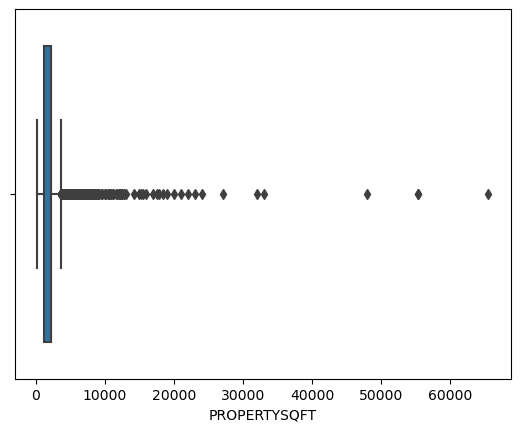

In [21]:
sns.boxplot(x = 'PROPERTYSQFT', data = df)

<Axes: xlabel='PRICE'>

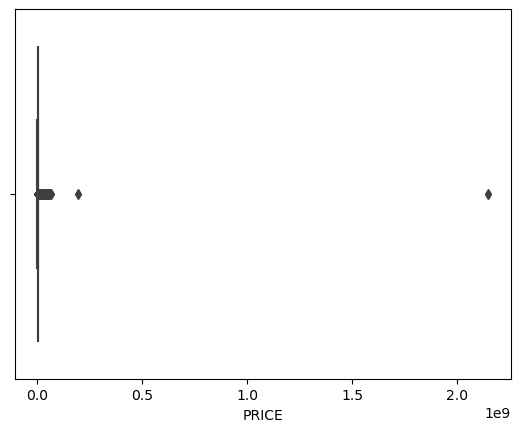

In [22]:
sns.boxplot(x = 'PRICE', data = df)

## Pie Chart

In [23]:
TYPE = {
0 : "Co-op for sale",                
1 : "House for sale",                
2 : "Condo for sale",                 
3 : "Multi-family home for sale",    
4 : "Townhouse for sale",             
5 : "Pending",                        
6 : "Contingent",                   
7 : "Land for sale",                   
8 : "For sale",          
9 : "Foreclosure",         
10 : "Condop for sale",              
11 : "Coming Soon",           
12 : "Mobile house for sale"
}

In [75]:
def PiePlot(column,shadow=None):

    plt.figure(figsize=(12,6))
    myexplode = [0.05, 0, 0.05, 0, 0.5]

    plt.pie(df[column].value_counts().nlargest(5), labels = df[column].value_counts().nlargest(5).index, shadow = True, autopct = "%1.1f%%", explode = myexplode)
    plt.title(f'Pie Chart of Top 5 Real Estate Types')
    plt.show()

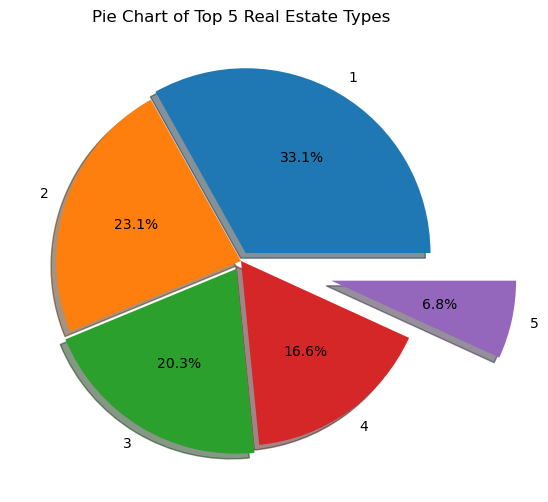

Top 5 Home Types by Numbers 

1    1450
2    1012
3     891
4     727
5     299
Name: TYPE, dtype: int64


In [76]:
PiePlot('TYPE')
print('Top 5 Home Types by Numbers \n')

print(df['TYPE'].value_counts().nlargest(5))

Graph Explanation - XYZ_123

# Data Review and Exploration 

## Missing Data Review

In [26]:
NY_Housing_NaN = df.isna().sum()

print(NY_Housing_NaN)

BROKERTITLE                    0
TYPE                           0
PRICE                          0
BEDS                           0
BATH                           0
PROPERTYSQFT                   0
ADDRESS                        0
STATE                          0
MAIN_ADDRESS                   0
ADMINISTRATIVE_AREA_LEVEL_2    0
LOCALITY                       0
SUBLOCALITY                    0
STREET_NAME                    0
LONG_NAME                      0
FORMATTED_ADDRESS              0
LATITUDE                       0
LONGITUDE                      0
geometry                       0
PRICE_Int                      0
dtype: int64


## Descriptive Statistics 

In [27]:
df.describe()

,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,PRICE_Int
count,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000,4.801000e+03
mean,3.356801,2.373861,2184.207862,40.714227,-73.941601,2.356940e+06
std,2.602315,1.946962,2377.140894,0.087676,0.101082,3.135525e+07
min,1.000000,0.000000,230.000000,40.499546,-74.253033,2.494000e+03
25%,2.000000,1.000000,1200.000000,40.639375,-73.987143,4.990000e+05
50%,3.000000,2.000000,2184.207862,40.726749,-73.949189,8.250000e+05
75%,4.000000,3.000000,2184.207862,40.771923,-73.870638,1.495000e+06
max,50.000000,50.000000,65535.000000,40.912729,-73.702450,2.147484e+09


## Types, Shape, and Columns

In [28]:
df.dtypes

BROKERTITLE                      object
TYPE                             object
PRICE                            object
BEDS                              int64
BATH                            float64
PROPERTYSQFT                    float64
ADDRESS                          object
STATE                            object
MAIN_ADDRESS                     object
ADMINISTRATIVE_AREA_LEVEL_2      object
LOCALITY                         object
SUBLOCALITY                      object
STREET_NAME                      object
LONG_NAME                        object
FORMATTED_ADDRESS                object
LATITUDE                        float64
LONGITUDE                       float64
geometry                       geometry
PRICE_Int                         int64
dtype: object

In [29]:
print(df.shape)

(4801, 19)


In [30]:
df.columns

Index(['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT',
       'ADDRESS', 'STATE', 'MAIN_ADDRESS', 'ADMINISTRATIVE_AREA_LEVEL_2',
       'LOCALITY', 'SUBLOCALITY', 'STREET_NAME', 'LONG_NAME',
       'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE', 'geometry', 'PRICE_Int'],
      dtype='object')

# Data Pre-Processing 

In [31]:
df['BATH'] = df['BATH'].astype('int64')

In [32]:
df['PROPERTYSQFT'] = df['PROPERTYSQFT'].astype('int64')

In [33]:
df.dtypes

BROKERTITLE                      object
TYPE                             object
PRICE                            object
BEDS                              int64
BATH                              int64
PROPERTYSQFT                      int64
ADDRESS                          object
STATE                            object
MAIN_ADDRESS                     object
ADMINISTRATIVE_AREA_LEVEL_2      object
LOCALITY                         object
SUBLOCALITY                      object
STREET_NAME                      object
LONG_NAME                        object
FORMATTED_ADDRESS                object
LATITUDE                        float64
LONGITUDE                       float64
geometry                       geometry
PRICE_Int                         int64
dtype: object

In [34]:
df['TYPE'].nunique()

13

In [35]:
Type_List = df['TYPE'].unique().tolist()

In [36]:
print(Type_List)

['Condo for sale', 'House for sale', 'Townhouse for sale', 'Co-op for sale', 'Multi-family home for sale', 'For sale', 'Contingent', 'Land for sale', 'Foreclosure', 'Pending', 'Coming Soon', 'Mobile house for sale', 'Condop for sale']


In [37]:
df['TYPE'].value_counts()

Co-op for sale                1450
House for sale                1012
Condo for sale                 891
Multi-family home for sale     727
Townhouse for sale             299
Pending                        243
Contingent                      88
Land for sale                   49
For sale                        20
Foreclosure                     14
Condop for sale                  5
Coming Soon                      2
Mobile house for sale            1
Name: TYPE, dtype: int64

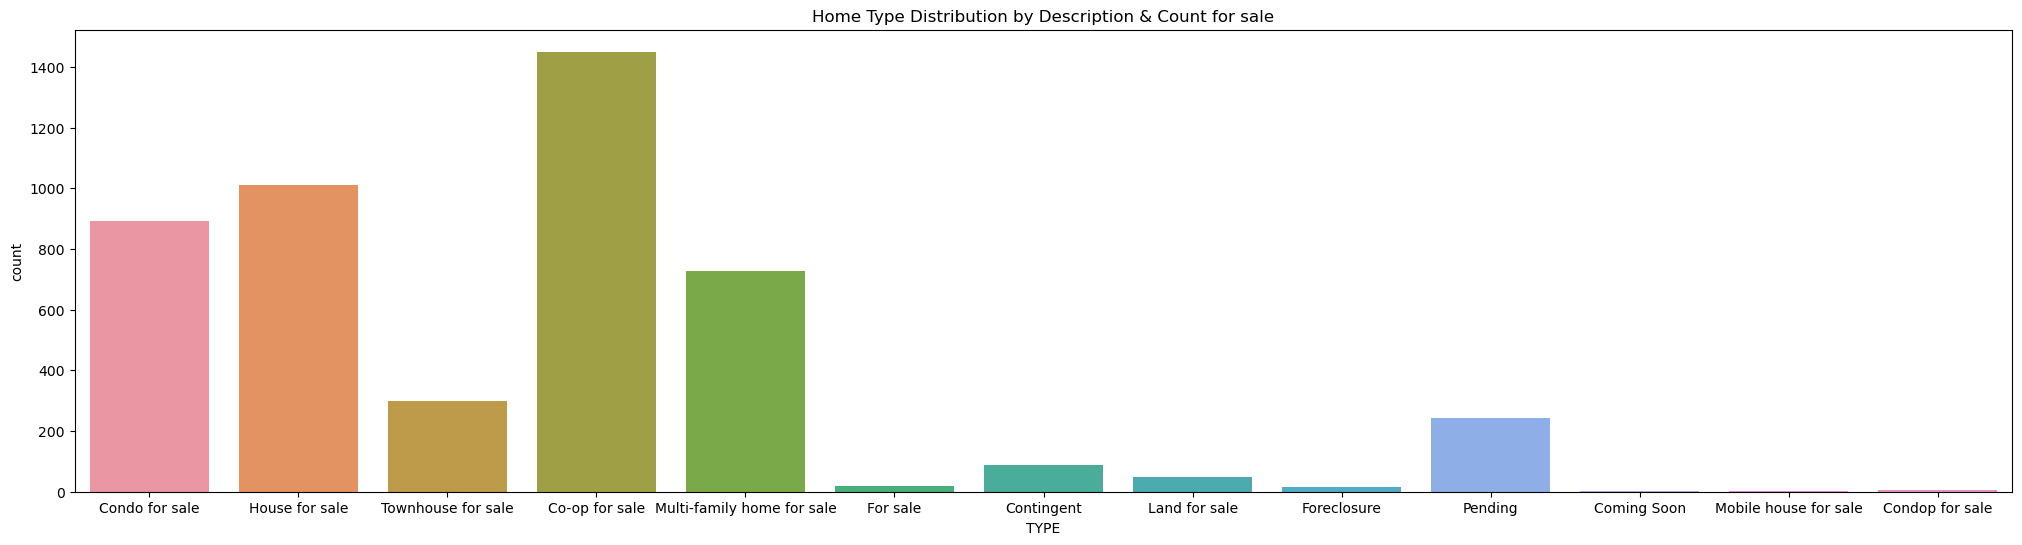

In [38]:
plt.figure(figsize=(25,6))
sns.countplot(x='TYPE', data=df)
plt.title('Home Type Distribution by Description & Count for sale')
plt.show()

## Data Preparation

In [39]:
df.head(1)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,geometry,PRICE_Int
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,"315,000",2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,POINT (-73.97448 40.76125),315000


#### Brokertitle Data is not needed for this Analysis and is being removed.

In [40]:
df = df.drop('BROKERTITLE', axis=1)

#### LATITUDE, LONGITUDE, FORMATTED_ADDRESS are redundant variables and are being removed.

In [41]:
df.head(1)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,geometry,PRICE_Int
0,Condo for sale,"315,000",2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,POINT (-73.97448 40.76125),315000


In [42]:
df = df.drop('LATITUDE', axis=1)

In [43]:
df = df.drop('LONGITUDE', axis=1)

In [44]:
df = df.drop('FORMATTED_ADDRESS', axis=1)

#### Data Type Conversion for preprocessing for uniformity.

In [45]:
df.head(1)

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,geometry,PRICE_Int
0,Condo for sale,"315,000",2,2,1400,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,POINT (-73.97448 40.76125),315000


In [46]:
df['PROPERTYSQFT'] = df['PROPERTYSQFT'].astype('int64')

In [47]:
df['BATH'] = df['BATH'].astype('int64')

#### Data Type Conversion for modeling.

In [48]:
df['TYPE'].replace({'Co-op for sale':1,'House for sale':2, 'Condo for sale':3, 'Multi-family home for sale':4, 'Townhouse for sale': 5, 'Pending': 6,'Contingent' : 7}, inplace=True)

In [49]:
df['TYPE'].replace({'Land for sale':8,'For sale':9, 'Foreclosure':10, 'Condop for sale':11, 'Coming Soon': 12, 'Mobile house for sale': 13}, inplace=True)

In [50]:
df['TYPE'] = df['TYPE'].astype('int64')

In [51]:
df.dtypes

TYPE                              int64
PRICE                            object
BEDS                              int64
BATH                              int64
PROPERTYSQFT                      int64
ADDRESS                          object
STATE                            object
MAIN_ADDRESS                     object
ADMINISTRATIVE_AREA_LEVEL_2      object
LOCALITY                         object
SUBLOCALITY                      object
STREET_NAME                      object
LONG_NAME                        object
geometry                       geometry
PRICE_Int                         int64
dtype: object

In [52]:
df2 = df.drop(['ADDRESS','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','SUBLOCALITY','STREET_NAME','LONG_NAME'], axis=1)

In [53]:
df2.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,geometry,PRICE_Int
0,3,"315,000",2,2,1400,POINT (-73.97448 40.76125),315000
1,3,"195,000,000",7,10,17545,POINT (-73.98099 40.76639),195000000
2,2,"260,000",4,2,2015,POINT (-74.19611 40.54181),260000
3,3,"69,000",3,1,445,POINT (-73.97461 40.76140),69000
4,5,"55,000,000",7,2,14175,POINT (-73.96986 40.76722),55000000


#### Drop previously modified and created columns.

In [54]:
df2 = df2.drop(['PRICE','geometry'], axis=1)

#### Rename previously modified column name back,

In [55]:
df2 = df2.rename(columns={'PRICE_Int':'PRICE'})

# Modeling

### Data Model 1: KNN

In [56]:
df2.head()

,TYPE,BEDS,BATH,PROPERTYSQFT,PRICE
0,3,2,2,1400,315000
1,3,7,10,17545,195000000
2,2,4,2,2015,260000
3,3,3,1,445,69000
4,5,7,2,14175,55000000


In [57]:
X = df2.drop('PRICE', axis=1) # features 
y = df2['PRICE'] # target 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
pipeline = Pipeline([('scaler', MinMaxScaler()),('classifier', KNeighborsClassifier())])

In [60]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier())])

In [61]:
accuracy = pipeline.score(X_test, y_test)

print("The accuracy of the KNN classifier from the test set is: {:.2f}".format(accuracy*100),"%")

The accuracy of the KNN classifier from the test set is: 1.56 %


In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11], 
    'classifier__weights': ['uniform', 'distance'], 
    'classifier__p': [1, 2],  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy with Best Hyperparameters:", accuracy)

/Users/carloscano/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters: {'classifier__n_neighbors': 3, 'classifier__p': 1, 'classifier__weights': 'distance'}
Accuracy with Best Hyperparameters: 0.05098855359001041


### Data Model 2: Linear Regression

In [63]:
model = linear_model.LinearRegression()

In [64]:
model.fit(X,y)

LinearRegression()

In [65]:
model = sm.OLS(y_train, X_train).fit() 

In [66]:
prediction = model.predict(X_test)

In [67]:
print("The R^2 score of the Linear Regression model is: {:.2f}".format(r2_score(y_test, prediction)))

The R^2 score of the Linear Regression model is: 0.21


In [68]:
y_pred = pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("The R^2 score of the KNN classifier on the test set is: {:.2f}".format(r2))

The R^2 score of the KNN classifier on the test set is: 0.17


### Data Model 3: SVM – Support vector Machine

In [69]:
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
 
print(mean_absolute_percentage_error(y_test, Y_pred))

0.8665279596805506
